In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 데이터 읽기

In [4]:
train_df=pd.read_csv("movies_train.csv")
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [6]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


## train, submission 데이터 합치기

In [10]:
all_df = pd.concat([train_df, submission_df])
print(all_df.shape)
all_df.head()

(843, 12)


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0


In [11]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


## 사용하지 않을 컬럼 삭제

In [12]:
all_df.drop(columns=["title",
                     "distributor",
                     "genre",
                     "release_time",
                     "screening_rat",
                     "director"], inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            843 non-null    int64  
 1   dir_prev_bfnum  377 non-null    float64
 2   dir_prev_num    843 non-null    int64  
 3   num_staff       843 non-null    int64  
 4   num_actor       843 non-null    int64  
 5   box_off_num     600 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 46.1 KB


## 결측치 처리

In [13]:
all_df = all_df.fillna(0)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            843 non-null    int64  
 1   dir_prev_bfnum  843 non-null    float64
 2   dir_prev_num    843 non-null    int64  
 3   num_staff       843 non-null    int64  
 4   num_actor       843 non-null    int64  
 5   box_off_num     843 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 46.1 KB


## 전처리 전의 데이터 분포 시각화

### time

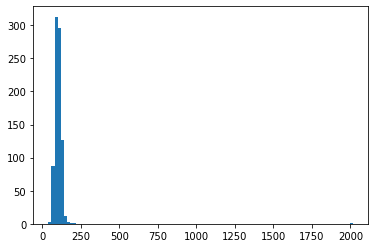

In [15]:
plt.hist(all_df.time, bins=100)
plt.show()

### dir_prev_bfnum

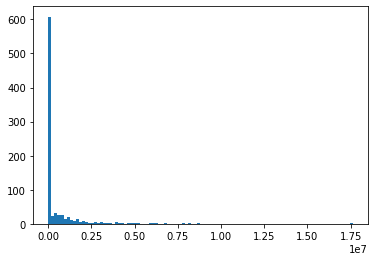

In [16]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

### dir_prev_num

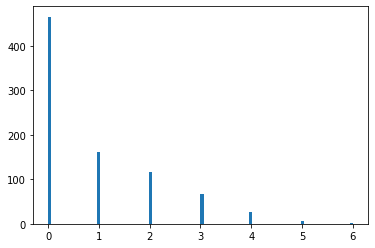

In [17]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

### num_staff

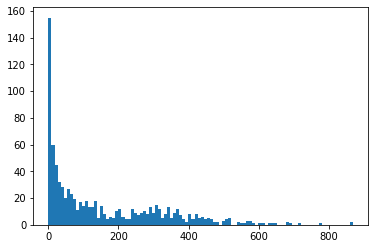

In [18]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

### num_actor

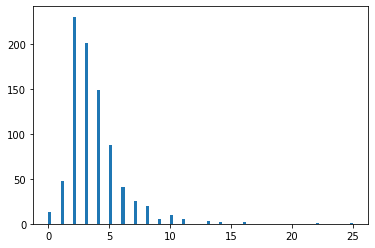

In [19]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

### box_off_num

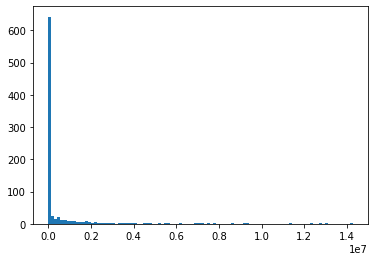

In [20]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

## 컬럼별 전처리

### time

200넘는 이상치 200으로 바꾸기

In [21]:
all_df.loc[all_df.time > 250, "time"]=200

### dir_prev_bfnum

1을 더한 로그처리를 해주기

In [22]:
all_df["dir_prev_bfnum"]=np.log1p(all_df.dir_prev_bfnum)

### num_staff

1을 더한 로그처리를 해주기

In [23]:
all_df["num_staff"]=np.log1p(all_df.num_staff)

### num_actor

20 넘는 값을 20으로 바꾸기

In [24]:
all_df.loc[all_df.num_actor > 20, "num_actor"] = 20

### box_off_num

1을 더한 로그처리 해주기

In [25]:
all_df["box_off_num"]=np.log1p(all_df.box_off_num)

## Normalization

### time, dir_prev_bfnum, dir_prev_num, num_staff, num_actor

In [26]:
all_df["time"] = (all_df.time - all_df.time.min()) / (all_df.time.max() - all_df.time.min())
all_df["dir_prev_bfnum"] = (all_df.dir_prev_bfnum - all_df.dir_prev_bfnum.min()) / (all_df.dir_prev_bfnum.max() - all_df.dir_prev_bfnum.min())
all_df["dir_prev_num"] = (all_df.dir_prev_num - all_df.dir_prev_num.min()) / (all_df.dir_prev_num.max() - all_df.dir_prev_num.min())
all_df["num_staff"] = (all_df.num_staff - all_df.num_staff.min()) / (all_df.num_staff.max() - all_df.num_staff.min())
all_df["num_actor"] = (all_df.num_actor - all_df.num_actor.min()) / (all_df.num_actor.max() - all_df.num_actor.min())

### box_off_num

In [27]:
y_min = all_df.box_off_num.min()
y_max = all_df.box_off_num.max()

all_df["box_off_num"] = (all_df.box_off_num - y_min) / (y_max - y_min)

## 전처리 후의 데이터 분포 보기

### time

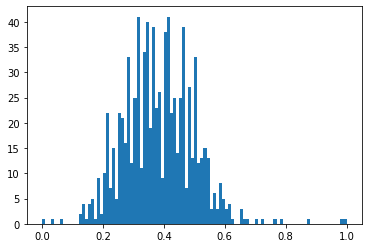

In [28]:
plt.hist(all_df.time, bins=100)
plt.show()

### dir_prev_bfnum

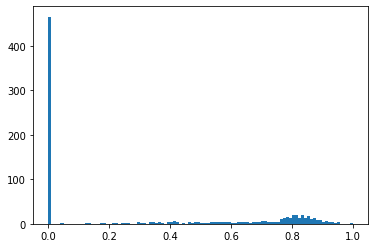

In [29]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

### dir_prev_num

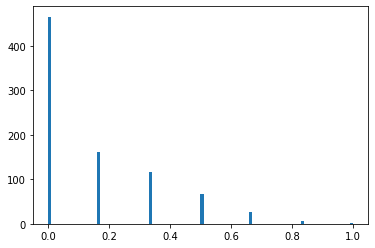

In [30]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

### num_staff

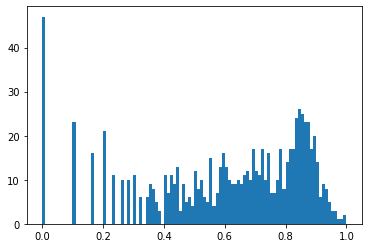

In [31]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

### num_actor

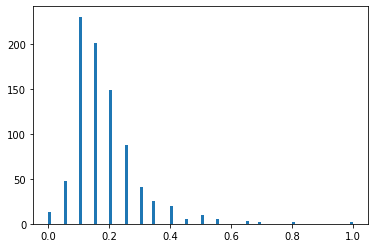

In [32]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

### box_off_num

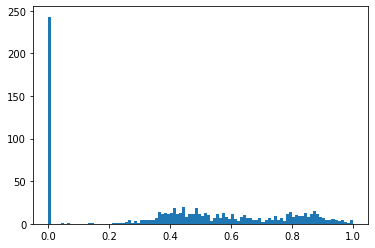

In [33]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

## train, test, submission 데이터로 분리

In [35]:
train_df = all_df.iloc[:500]
test_df = all_df.iloc[500:600]
submission_df = all_df.iloc[600:]
print(train_df.shape, test_df.shape, submission_df.shape)

(500, 6) (100, 6) (243, 6)


## x,y로 분리

In [40]:
train_y = train_df.box_off_num.to_numpy()
train_x_df = train_df.drop(columns=["box_off_num"])
train_x = train_x_df.to_numpy()

In [41]:
test_y = test_df.box_off_num.to_numpy()
test_x_df = test_df.drop(columns=["box_off_num"])
test_x = test_x_df.to_numpy()

In [42]:
submission_y = submission_df.box_off_num.to_numpy()
submission_x_df = submission_df.drop(columns=["box_off_num"])
submission_x = submission_x_df.to_numpy()

## 딥러닝 학습

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


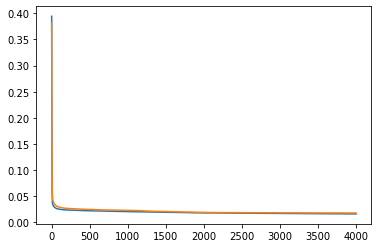

In [44]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

model = keras.Sequential()
model.add(Dense(10, activation = 'relu', input_shape=(train_x.shape[1],)))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

hist = model.fit(train_x, train_y, epochs=4000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

4/4 [==============================] - 0s 4ms/step - loss: 0.0146 - mape: 16.2151
loss 0.014591647312045097
mape 16.215129852294922


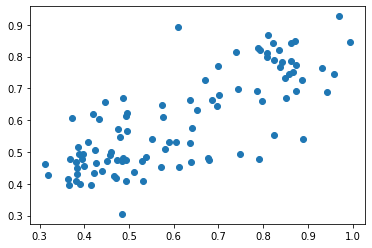

In [48]:
loss, mape = model.evaluate(test_x, test_y)
print("loss", loss)
print("mape",mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

## RMSE 계산하기

In [49]:
predicted = y_ * (y_max - y_min) + y_min
predicted = np.exp(predicted) - 1.

org_test_y = test_y * (y_max - y_min) + y_min
org_test_y = np.exp(org_test_y) - 1.

rmse tf.Tensor(1687417.1, shape=(), dtype=float32)


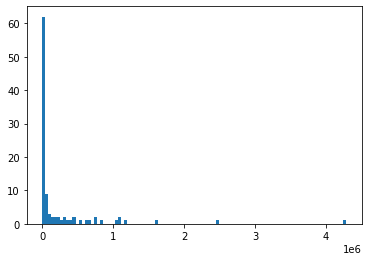

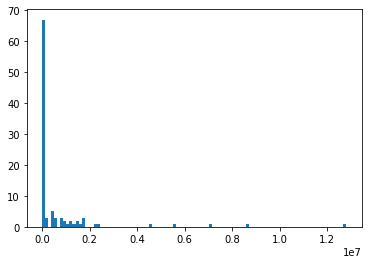

In [51]:
from tensorflow.keras.metrics import RootMeanSquaredError

rmse = RootMeanSquaredError()(org_test_y, predicted)
print("rmse",rmse)

plt.hist(predicted, bins = 100)
plt.show()
plt.hist(org_test_y, bins = 100)
plt.show()

## 예측하기

In [52]:
predicted = model.predict(submission_x)

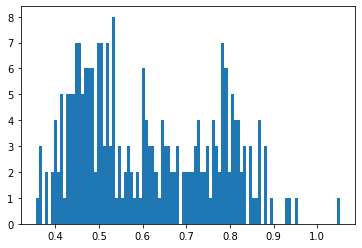

In [53]:
plt.hist(predicted, bins = 100)
plt.show()

In [54]:
predicted = predicted * (y_max - y_min) +y_min

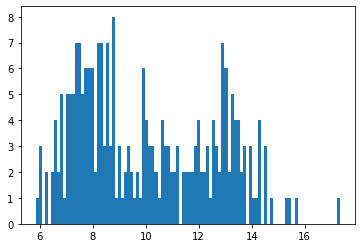

In [55]:
plt.hist(predicted, bins = 100)
plt.show()

In [56]:
predicted = np.exp(predicted) -1.

In [57]:
predicted.shape

(243, 1)

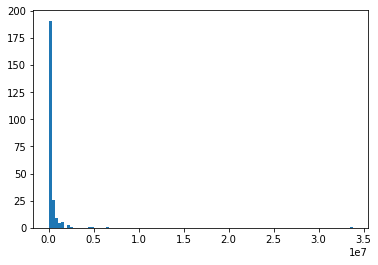

In [58]:
plt.hist(predicted.flatten(), bins=100)
plt.show()

## submission 파일 만들기

In [60]:
!head submission.csv

title,box_off_num
용서는 없다,0
아빠가 여자를 좋아해,0
하모니,0
의형제,0
평행 이론,0
회오리 바람,0
경계도시 2,0
이웃집 남자,0
아마존의 눈물 극장판,0


In [62]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [64]:
final_df = pd.DataFrame(submission_df.title)
final_df.head()

,title
0,용서는 없다
1,아빠가 여자를 좋아해
2,하모니
3,의형제
4,평행 이론


In [65]:
final_df['box_off_num'] = predicted.astype(np.int)
final_df.head()

,title,box_off_num
0,용서는 없다,660832
1,아빠가 여자를 좋아해,400707
2,하모니,763427
3,의형제,651295
4,평행 이론,466052


In [66]:
final_df.to_csv("submission.csv", index=False)

In [68]:
!head submission.csv

title,box_off_num
용서는 없다,660832
아빠가 여자를 좋아해,400707
하모니,763427
의형제,651295
평행 이론,466052
회오리 바람,24273
경계도시 2,2584
이웃집 남자,9754
아마존의 눈물 극장판,5429


# 두번째 시도

카테고리 데이터 사용하기

## 데이터 읽기

In [78]:
train_df=pd.read_csv("movies_train.csv")
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [79]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


## train, submission 데이터 합치기

In [80]:
all_df = pd.concat([train_df, submission_df])
print(all_df.shape)
all_df.head()

(843, 12)


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0


In [81]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


## 카테고리 데이터 인코딩

In [82]:
all_df.distributor = all_df.distributor.astype("category")
all_df["distributor_code"] = all_df.distributor.cat.codes 

all_df.genre = all_df.genre.astype("category")
all_df["genre_code"] = all_df.genre.cat.codes 

all_df.screening_rat = all_df.screening_rat.astype("category")
all_df["screening_rat_code"] = all_df.screening_rat.cat.codes 

## 카테고리 데이터 one-hot 인코딩

In [83]:
all_df = pd.get_dummies(all_df, columns = ['distributor_code'])
all_df = pd.get_dummies(all_df, columns = ['genre_code'])
all_df = pd.get_dummies(all_df, columns = ['screening_rat_code'])

## 사용하지 않을 컬럼 삭제

In [84]:
all_df.drop(columns=["title",
                     "distributor",
                     "genre",
                     "release_time",
                     "screening_rat",
                     "director"], inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 226 entries, time to screening_rat_code_3
dtypes: float64(2), int64(4), uint8(220)
memory usage: 227.2 KB


## 결측치 처리

In [85]:
all_df = all_df.fillna(0)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 226 entries, time to screening_rat_code_3
dtypes: float64(2), int64(4), uint8(220)
memory usage: 227.2 KB


## 전처리 전의 데이터 분포 시각화

### time

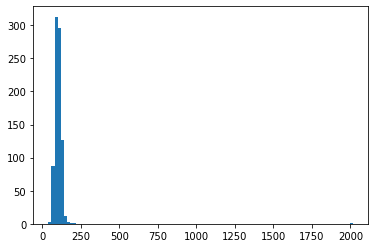

In [86]:
plt.hist(all_df.time, bins=100)
plt.show()

### dir_prev_bfnum

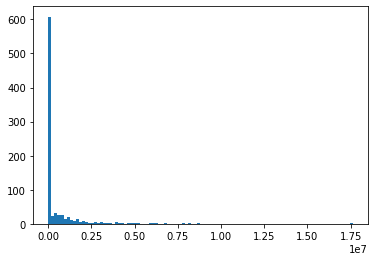

In [87]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

### dir_prev_num

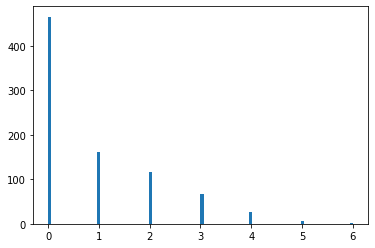

In [88]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

### num_staff

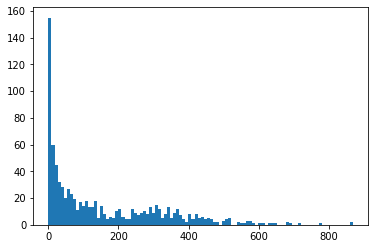

In [89]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

### num_actor

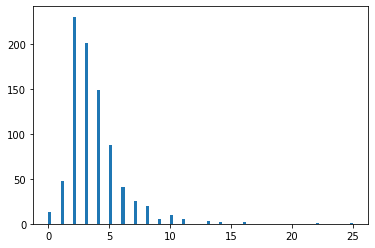

In [90]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

### box_off_num

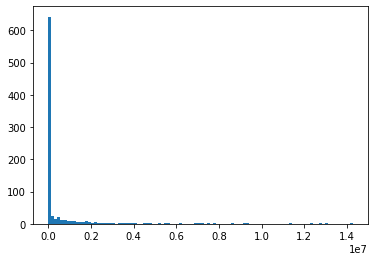

In [91]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

## 컬럼별 전처리

### time

200넘는 이상치 200으로 바꾸기

In [92]:
all_df.loc[all_df.time > 250, "time"]=200

### dir_prev_bfnum

1을 더한 로그처리를 해주기

In [93]:
all_df["dir_prev_bfnum"]=np.log1p(all_df.dir_prev_bfnum)

### num_staff

1을 더한 로그처리를 해주기

In [94]:
all_df["num_staff"]=np.log1p(all_df.num_staff)

### num_actor

20 넘는 값을 20으로 바꾸기

In [95]:
all_df.loc[all_df.num_actor > 20, "num_actor"] = 20

### box_off_num

1을 더한 로그처리 해주기

In [96]:
all_df["box_off_num"]=np.log1p(all_df.box_off_num)

## Normalization

### time, dir_prev_bfnum, dir_prev_num, num_staff, num_actor

In [97]:
all_df["time"] = (all_df.time - all_df.time.min()) / (all_df.time.max() - all_df.time.min())
all_df["dir_prev_bfnum"] = (all_df.dir_prev_bfnum - all_df.dir_prev_bfnum.min()) / (all_df.dir_prev_bfnum.max() - all_df.dir_prev_bfnum.min())
all_df["dir_prev_num"] = (all_df.dir_prev_num - all_df.dir_prev_num.min()) / (all_df.dir_prev_num.max() - all_df.dir_prev_num.min())
all_df["num_staff"] = (all_df.num_staff - all_df.num_staff.min()) / (all_df.num_staff.max() - all_df.num_staff.min())
all_df["num_actor"] = (all_df.num_actor - all_df.num_actor.min()) / (all_df.num_actor.max() - all_df.num_actor.min())

### box_off_num

In [98]:
y_min = all_df.box_off_num.min()
y_max = all_df.box_off_num.max()

all_df["box_off_num"] = (all_df.box_off_num - y_min) / (y_max - y_min)

## 전처리 후의 데이터 분포 보기

### time

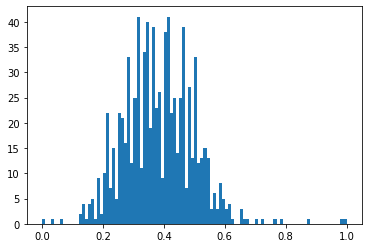

In [99]:
plt.hist(all_df.time, bins=100)
plt.show()

### dir_prev_bfnum

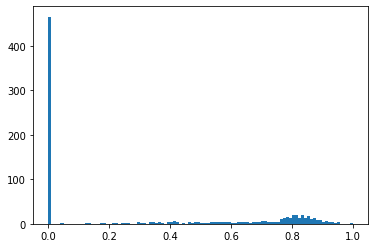

In [100]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

### dir_prev_num

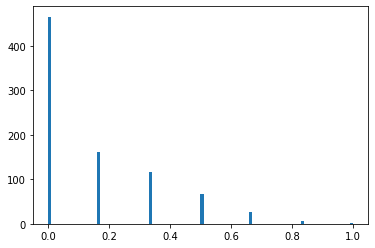

In [101]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

### num_staff

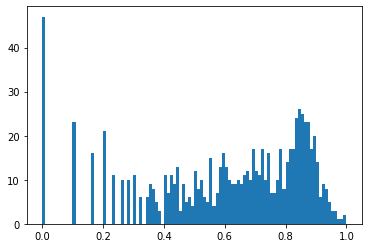

In [102]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

### num_actor

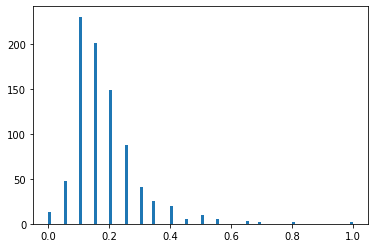

In [103]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

### box_off_num

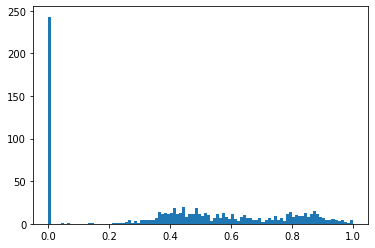

In [104]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

## train, test, submission 데이터로 분리

In [105]:
train_df = all_df.iloc[:500]
test_df = all_df.iloc[500:600]
submission_df = all_df.iloc[600:]
print(train_df.shape, test_df.shape, submission_df.shape)

(500, 226) (100, 226) (243, 226)


## x,y로 분리

In [106]:
train_y = train_df.box_off_num.to_numpy()
train_x_df = train_df.drop(columns=["box_off_num"])
train_x = train_x_df.to_numpy()

In [107]:
test_y = test_df.box_off_num.to_numpy()
test_x_df = test_df.drop(columns=["box_off_num"])
test_x = test_x_df.to_numpy()

In [108]:
submission_y = submission_df.box_off_num.to_numpy()
submission_x_df = submission_df.drop(columns=["box_off_num"])
submission_x = submission_x_df.to_numpy()

## 딥러닝 학습

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                2260      
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,381
Trainable params: 2,381
Non-trainable params: 0
_________________________________________________________________


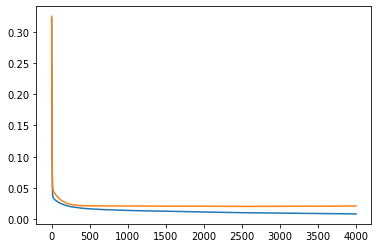

In [109]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

model = keras.Sequential()
model.add(Dense(10, activation = 'relu', input_shape=(train_x.shape[1],)))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

hist = model.fit(train_x, train_y, epochs=4000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

4/4 [==============================] - 0s 4ms/step - loss: 0.0148 - mape: 17.3968
loss 0.014814701862633228
mape 17.396800994873047


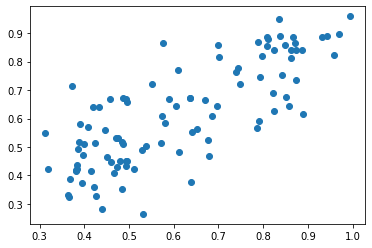

In [110]:
loss, mape = model.evaluate(test_x, test_y)
print("loss", loss)
print("mape",mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

## RMSE 계산하기

In [111]:
predicted = y_ * (y_max - y_min) + y_min
predicted = np.exp(predicted) - 1.

org_test_y = test_y * (y_max - y_min) + y_min
org_test_y = np.exp(org_test_y) - 1.

rmse tf.Tensor(1340743.6, shape=(), dtype=float32)


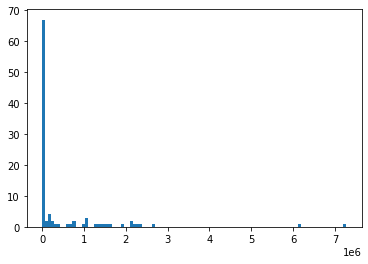

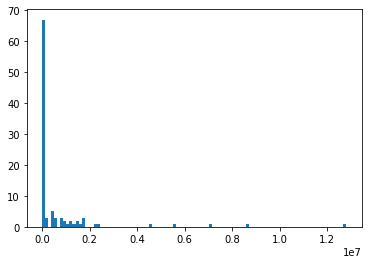

In [112]:
from tensorflow.keras.metrics import RootMeanSquaredError

rmse = RootMeanSquaredError()(org_test_y, predicted)
print("rmse",rmse)

plt.hist(predicted, bins = 100)
plt.show()
plt.hist(org_test_y, bins = 100)
plt.show()

## 예측하기

In [113]:
predicted = model.predict(submission_x)

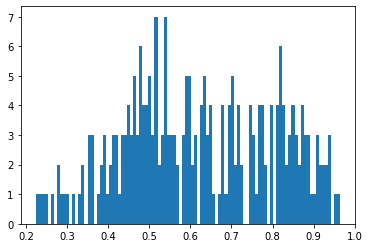

In [114]:
plt.hist(predicted, bins = 100)
plt.show()

In [115]:
predicted = predicted * (y_max - y_min) +y_min

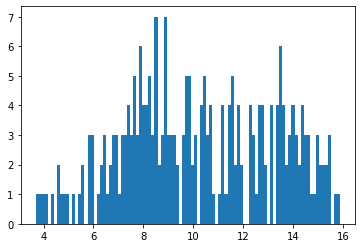

In [116]:
plt.hist(predicted, bins = 100)
plt.show()

In [117]:
predicted = np.exp(predicted) -1.

In [118]:
predicted.shape

(243, 1)

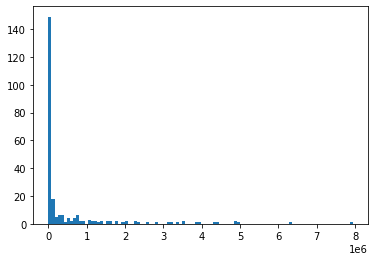

In [119]:
plt.hist(predicted.flatten(), bins=100)
plt.show()

## submission 파일 만들기

In [120]:
!head submission.csv

title,box_off_num
용서는 없다,660832
아빠가 여자를 좋아해,400707
하모니,763427
의형제,651295
평행 이론,466052
회오리 바람,24273
경계도시 2,2584
이웃집 남자,9754
아마존의 눈물 극장판,5429


In [121]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [122]:
final_df = pd.DataFrame(submission_df.title)
final_df.head()

,title
0,용서는 없다
1,아빠가 여자를 좋아해
2,하모니
3,의형제
4,평행 이론


In [123]:
final_df['box_off_num'] = predicted.astype(np.int)
final_df.head()

,title,box_off_num
0,용서는 없다,1044311
1,아빠가 여자를 좋아해,3346733
2,하모니,1752503
3,의형제,2547401
4,평행 이론,2049104


In [124]:
final_df.to_csv("submission.csv", index=False)

In [125]:
!head submission.csv

title,box_off_num
용서는 없다,1044311
아빠가 여자를 좋아해,3346733
하모니,1752503
의형제,2547401
평행 이론,2049104
회오리 바람,18687
경계도시 2,1288
이웃집 남자,9552
아마존의 눈물 극장판,7171


# 세번째 시도

release_time 사용하기

## 데이터 읽기

In [126]:
train_df=pd.read_csv("movies_train.csv")
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [127]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


## train, submission 데이터 합치기

In [128]:
all_df = pd.concat([train_df, submission_df])
print(all_df.shape)
all_df.head()

(843, 12)


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0


In [129]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


## release_time 값을 조정

'2021-12-31' 값을 '2021-12'로 바꾸기

In [130]:
print(all_df.release_time[:5])
all_df["release_time"] = all_df.release_time.str[:7]
print(all_df.release_time[:5])

0    2012-11-22
1    2015-11-19
2    2013-06-05
3    2012-07-12
4    2010-11-04
Name: release_time, dtype: object
0    2012-11
1    2015-11
2    2013-06
3    2012-07
4    2010-11
Name: release_time, dtype: object


## 카테고리 데이터 인코딩

In [132]:
all_df.distributor = all_df.distributor.astype("category")
all_df["distributor_code"] = all_df.distributor.cat.codes 

all_df.genre = all_df.genre.astype("category")
all_df["genre_code"] = all_df.genre.cat.codes 

all_df.screening_rat = all_df.screening_rat.astype("category")
all_df["screening_rat_code"] = all_df.screening_rat.cat.codes 

all_df.release_time = all_df.release_time.astype('category')
all_df['release_time_code'] = all_df.release_time.cat.codes

## 카테고리 데이터 one-hot 인코딩

In [134]:
all_df = pd.get_dummies(all_df, columns = ['distributor_code'])
all_df = pd.get_dummies(all_df, columns = ['genre_code'])
all_df = pd.get_dummies(all_df, columns = ['screening_rat_code'])
all_df = pd.get_dummies(all_df, columns = ['release_time_code'])

KeyError: ignored

## 사용하지 않을 컬럼 삭제

In [135]:
all_df.drop(columns=["title",
                     "distributor",
                     "genre",
                     "release_time",
                     "screening_rat",
                     "director"], inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 298 entries, time to release_time_code_71
dtypes: float64(2), int64(4), uint8(292)
memory usage: 286.5 KB


## 결측치 처리

In [136]:
all_df = all_df.fillna(0)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 298 entries, time to release_time_code_71
dtypes: float64(2), int64(4), uint8(292)
memory usage: 286.5 KB


## 전처리 전의 데이터 분포 시각화

### time

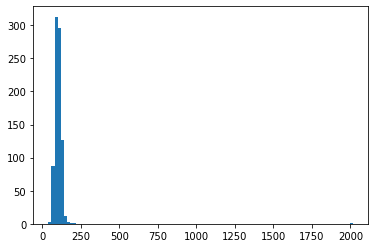

In [137]:
plt.hist(all_df.time, bins=100)
plt.show()

### dir_prev_bfnum

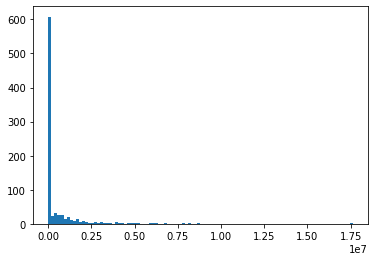

In [138]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

### dir_prev_num

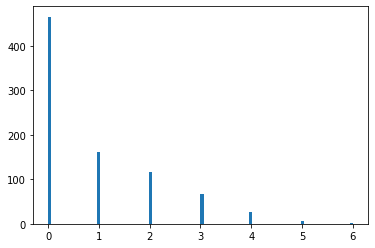

In [139]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

### num_staff

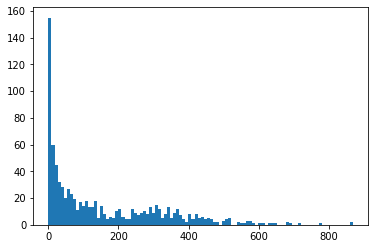

In [140]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

### num_actor

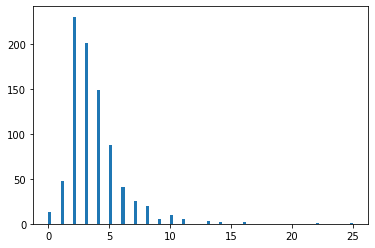

In [141]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

### box_off_num

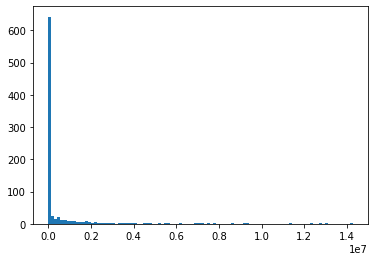

In [142]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

## 컬럼별 전처리

### time

200넘는 이상치 200으로 바꾸기

In [143]:
all_df.loc[all_df.time > 250, "time"]=200

### dir_prev_bfnum

1을 더한 로그처리를 해주기

In [144]:
all_df["dir_prev_bfnum"]=np.log1p(all_df.dir_prev_bfnum)

### num_staff

1을 더한 로그처리를 해주기

In [145]:
all_df["num_staff"]=np.log1p(all_df.num_staff)

### num_actor

20 넘는 값을 20으로 바꾸기

In [146]:
all_df.loc[all_df.num_actor > 20, "num_actor"] = 20

### box_off_num

1을 더한 로그처리 해주기

In [147]:
all_df["box_off_num"]=np.log1p(all_df.box_off_num)

## Normalization

### time, dir_prev_bfnum, dir_prev_num, num_staff, num_actor

In [148]:
all_df["time"] = (all_df.time - all_df.time.min()) / (all_df.time.max() - all_df.time.min())
all_df["dir_prev_bfnum"] = (all_df.dir_prev_bfnum - all_df.dir_prev_bfnum.min()) / (all_df.dir_prev_bfnum.max() - all_df.dir_prev_bfnum.min())
all_df["dir_prev_num"] = (all_df.dir_prev_num - all_df.dir_prev_num.min()) / (all_df.dir_prev_num.max() - all_df.dir_prev_num.min())
all_df["num_staff"] = (all_df.num_staff - all_df.num_staff.min()) / (all_df.num_staff.max() - all_df.num_staff.min())
all_df["num_actor"] = (all_df.num_actor - all_df.num_actor.min()) / (all_df.num_actor.max() - all_df.num_actor.min())

### box_off_num

In [149]:
y_min = all_df.box_off_num.min()
y_max = all_df.box_off_num.max()

all_df["box_off_num"] = (all_df.box_off_num - y_min) / (y_max - y_min)

## 전처리 후의 데이터 분포 보기

### time

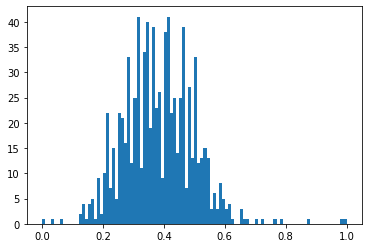

In [150]:
plt.hist(all_df.time, bins=100)
plt.show()

### dir_prev_bfnum

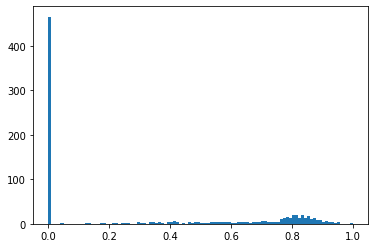

In [151]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

### dir_prev_num

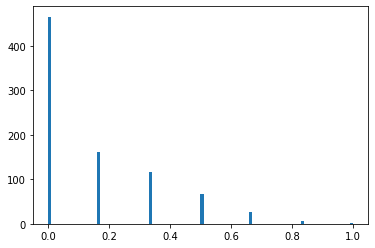

In [152]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

### num_staff

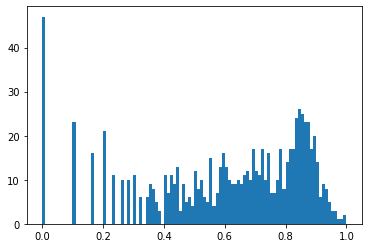

In [153]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

### num_actor

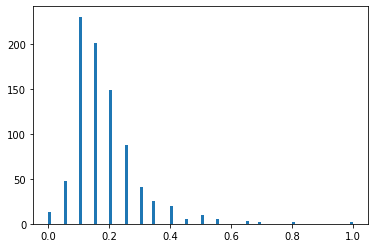

In [154]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

### box_off_num

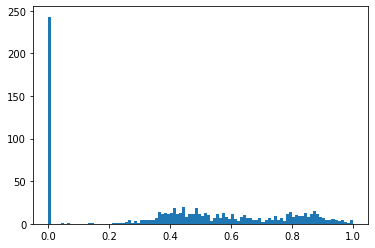

In [155]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

## train, test, submission 데이터로 분리

In [156]:
train_df = all_df.iloc[:500]
test_df = all_df.iloc[500:600]
submission_df = all_df.iloc[600:]
print(train_df.shape, test_df.shape, submission_df.shape)

(500, 298) (100, 298) (243, 298)


## x,y로 분리

In [157]:
train_y = train_df.box_off_num.to_numpy()
train_x_df = train_df.drop(columns=["box_off_num"])
train_x = train_x_df.to_numpy()

In [158]:
test_y = test_df.box_off_num.to_numpy()
test_x_df = test_df.drop(columns=["box_off_num"])
test_x = test_x_df.to_numpy()

In [159]:
submission_y = submission_df.box_off_num.to_numpy()
submission_x_df = submission_df.drop(columns=["box_off_num"])
submission_x = submission_x_df.to_numpy()

## 딥러닝 학습

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                2980      
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3,101
Trainable params: 3,101
Non-trainable params: 0
_________________________________________________________________


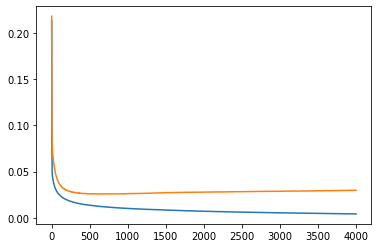

In [160]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

model = keras.Sequential()
model.add(Dense(10, activation = 'relu', input_shape=(train_x.shape[1],)))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

hist = model.fit(train_x, train_y, epochs=4000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

4/4 [==============================] - 0s 8ms/step - loss: 0.0179 - mape: 19.0427
loss 0.017923789098858833
mape 19.0427303314209


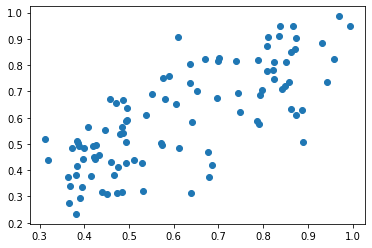

In [161]:
loss, mape = model.evaluate(test_x, test_y)
print("loss", loss)
print("mape",mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

## RMSE 계산하기

In [162]:
predicted = y_ * (y_max - y_min) + y_min
predicted = np.exp(predicted) - 1.

org_test_y = test_y * (y_max - y_min) + y_min
org_test_y = np.exp(org_test_y) - 1.

rmse tf.Tensor(1482843.2, shape=(), dtype=float32)


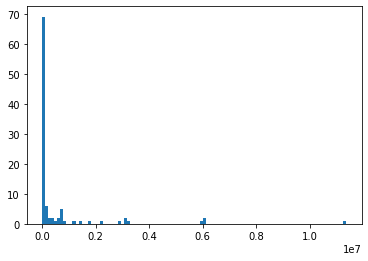

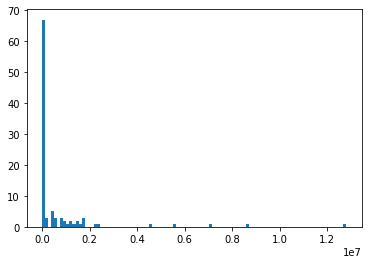

In [163]:
from tensorflow.keras.metrics import RootMeanSquaredError

rmse = RootMeanSquaredError()(org_test_y, predicted)
print("rmse",rmse)

plt.hist(predicted, bins = 100)
plt.show()
plt.hist(org_test_y, bins = 100)
plt.show()

## 예측하기

In [164]:
predicted = model.predict(submission_x)

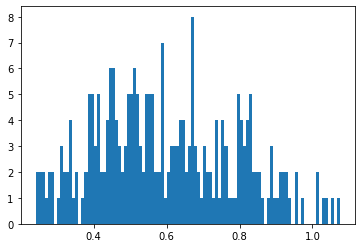

In [165]:
plt.hist(predicted, bins = 100)
plt.show()

In [166]:
predicted = predicted * (y_max - y_min) +y_min

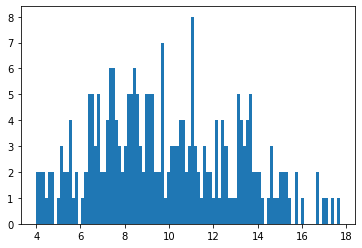

In [167]:
plt.hist(predicted, bins = 100)
plt.show()

In [168]:
predicted = np.exp(predicted) -1.

In [169]:
predicted.shape

(243, 1)

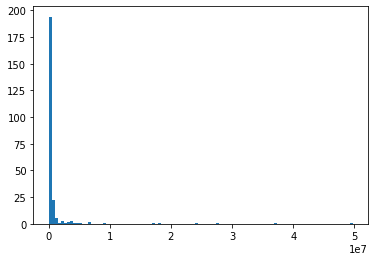

In [170]:
plt.hist(predicted.flatten(), bins=100)
plt.show()

## submission 파일 만들기

In [171]:
!head submission.csv

title,box_off_num
용서는 없다,1044311
아빠가 여자를 좋아해,3346733
하모니,1752503
의형제,2547401
평행 이론,2049104
회오리 바람,18687
경계도시 2,1288
이웃집 남자,9552
아마존의 눈물 극장판,7171


In [172]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [173]:
final_df = pd.DataFrame(submission_df.title)
final_df.head()

,title
0,용서는 없다
1,아빠가 여자를 좋아해
2,하모니
3,의형제
4,평행 이론


In [174]:
final_df['box_off_num'] = predicted.astype(np.int)
final_df.head()

,title,box_off_num
0,용서는 없다,202975
1,아빠가 여자를 좋아해,829885
2,하모니,508127
3,의형제,3898247
4,평행 이론,2364169


In [175]:
final_df.to_csv("submission.csv", index=False)

In [176]:
!head submission.csv

title,box_off_num
용서는 없다,202975
아빠가 여자를 좋아해,829885
하모니,508127
의형제,3898247
평행 이론,2364169
회오리 바람,119673
경계도시 2,5394
이웃집 남자,344590
아마존의 눈물 극장판,8694


# 네번째 시도

director 컬럼 사용하기

## 데이터 읽기

In [178]:
train_df=pd.read_csv("movies_train.csv")
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [179]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


## train, submission 데이터 합치기

In [180]:
all_df = pd.concat([train_df, submission_df])
print(all_df.shape)
all_df.head()

(843, 12)


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0


In [181]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


## release_time 값을 조정

'2021-12-31' 값을 '2021-12'로 바꾸기

In [182]:
print(all_df.release_time[:5])
all_df["release_time"] = all_df.release_time.str[:7]
print(all_df.release_time[:5])

0    2012-11-22
1    2015-11-19
2    2013-06-05
3    2012-07-12
4    2010-11-04
Name: release_time, dtype: object
0    2012-11
1    2015-11
2    2013-06
3    2012-07
4    2010-11
Name: release_time, dtype: object


## director 컬럼 카테고리화

In [183]:
print(len(all_df.director.unique()))

all_df.loc[all_df.dir_prev_num==0, 'director'] = "무명감독"
print(len(all_df.director.unique()))

614
291


## 카테고리 데이터 인코딩

In [184]:
all_df.distributor = all_df.distributor.astype("category")
all_df["distributor_code"] = all_df.distributor.cat.codes 

all_df.genre = all_df.genre.astype("category")
all_df["genre_code"] = all_df.genre.cat.codes 

all_df.screening_rat = all_df.screening_rat.astype("category")
all_df["screening_rat_code"] = all_df.screening_rat.cat.codes 

all_df.release_time = all_df.release_time.astype('category')
all_df['release_time_code'] = all_df.release_time.cat.codes

all_df.director = all_df.director.astype('category')
all_df['director_code'] = all_df.director.cat.codes

## 카테고리 데이터 one-hot 인코딩

In [185]:
all_df = pd.get_dummies(all_df, columns = ['distributor_code'])
all_df = pd.get_dummies(all_df, columns = ['genre_code'])
all_df = pd.get_dummies(all_df, columns = ['screening_rat_code'])
all_df = pd.get_dummies(all_df, columns = ['release_time_code'])
all_df = pd.get_dummies(all_df, columns = ['director_code'])

## 사용하지 않을 컬럼 삭제

In [186]:
all_df.drop(columns=["title",
                     "distributor",
                     "genre",
                     "release_time",
                     "screening_rat",
                     "director"], inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 589 entries, time to director_code_290
dtypes: float64(2), int64(4), uint8(583)
memory usage: 526.1 KB


## 결측치 처리

In [187]:
all_df = all_df.fillna(0)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 589 entries, time to director_code_290
dtypes: float64(2), int64(4), uint8(583)
memory usage: 526.1 KB


## 전처리 전의 데이터 분포 시각화

### time

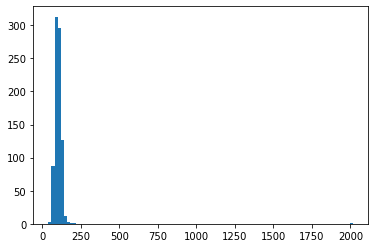

In [188]:
plt.hist(all_df.time, bins=100)
plt.show()

### dir_prev_bfnum

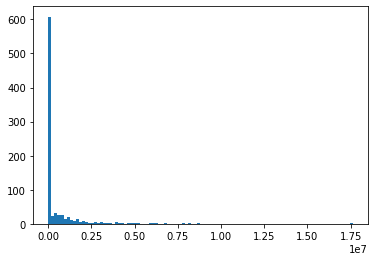

In [189]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

### dir_prev_num

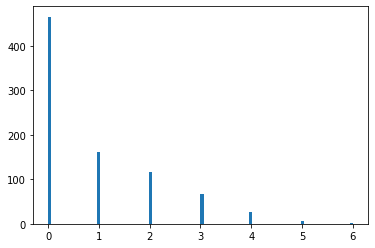

In [190]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

### num_staff

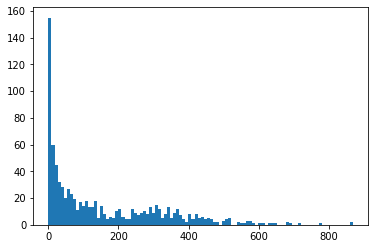

In [191]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

### num_actor

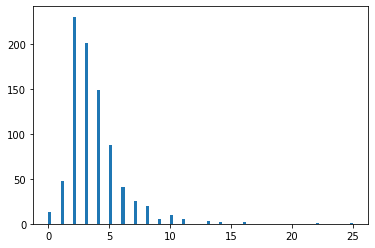

In [192]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

### box_off_num

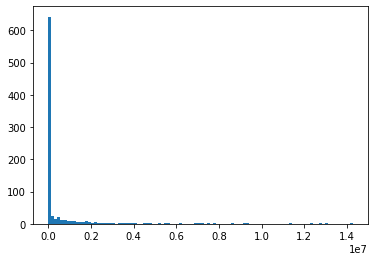

In [193]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

## 컬럼별 전처리

### time

200넘는 이상치 200으로 바꾸기

In [194]:
all_df.loc[all_df.time > 250, "time"]=200

### dir_prev_bfnum

1을 더한 로그처리를 해주기

In [195]:
all_df["dir_prev_bfnum"]=np.log1p(all_df.dir_prev_bfnum)

### num_staff

1을 더한 로그처리를 해주기

In [196]:
all_df["num_staff"]=np.log1p(all_df.num_staff)

### num_actor

20 넘는 값을 20으로 바꾸기

In [197]:
all_df.loc[all_df.num_actor > 20, "num_actor"] = 20

### box_off_num

1을 더한 로그처리 해주기

In [198]:
all_df["box_off_num"]=np.log1p(all_df.box_off_num)

## Normalization

### time, dir_prev_bfnum, dir_prev_num, num_staff, num_actor

In [199]:
all_df["time"] = (all_df.time - all_df.time.min()) / (all_df.time.max() - all_df.time.min())
all_df["dir_prev_bfnum"] = (all_df.dir_prev_bfnum - all_df.dir_prev_bfnum.min()) / (all_df.dir_prev_bfnum.max() - all_df.dir_prev_bfnum.min())
all_df["dir_prev_num"] = (all_df.dir_prev_num - all_df.dir_prev_num.min()) / (all_df.dir_prev_num.max() - all_df.dir_prev_num.min())
all_df["num_staff"] = (all_df.num_staff - all_df.num_staff.min()) / (all_df.num_staff.max() - all_df.num_staff.min())
all_df["num_actor"] = (all_df.num_actor - all_df.num_actor.min()) / (all_df.num_actor.max() - all_df.num_actor.min())

### box_off_num

In [200]:
y_min = all_df.box_off_num.min()
y_max = all_df.box_off_num.max()

all_df["box_off_num"] = (all_df.box_off_num - y_min) / (y_max - y_min)

## 전처리 후의 데이터 분포 보기

### time

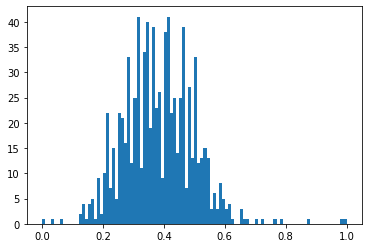

In [201]:
plt.hist(all_df.time, bins=100)
plt.show()

### dir_prev_bfnum

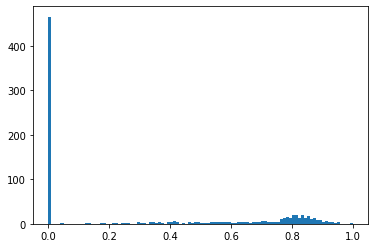

In [202]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

### dir_prev_num

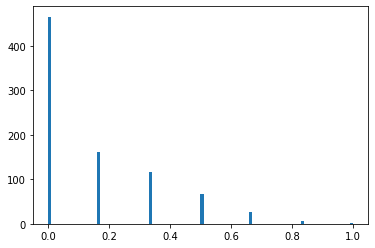

In [203]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

### num_staff

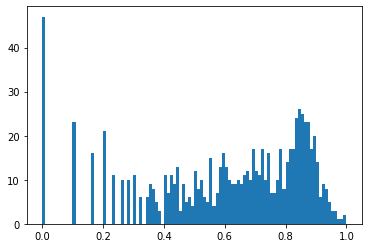

In [204]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

### num_actor

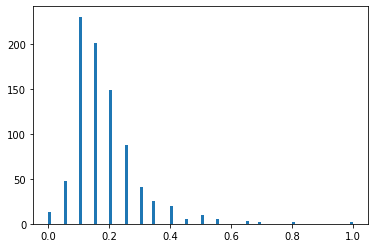

In [205]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

### box_off_num

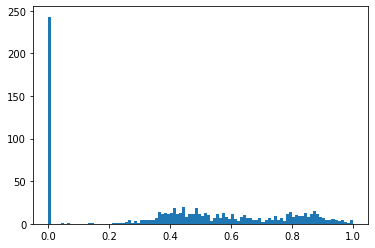

In [206]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

## train, test, submission 데이터로 분리

In [207]:
train_df = all_df.iloc[:500]
test_df = all_df.iloc[500:600]
submission_df = all_df.iloc[600:]
print(train_df.shape, test_df.shape, submission_df.shape)

(500, 589) (100, 589) (243, 589)


## x,y로 분리

In [208]:
train_y = train_df.box_off_num.to_numpy()
train_x_df = train_df.drop(columns=["box_off_num"])
train_x = train_x_df.to_numpy()

In [209]:
test_y = test_df.box_off_num.to_numpy()
test_x_df = test_df.drop(columns=["box_off_num"])
test_x = test_x_df.to_numpy()

In [210]:
submission_y = submission_df.box_off_num.to_numpy()
submission_x_df = submission_df.drop(columns=["box_off_num"])
submission_x = submission_x_df.to_numpy()

## 딥러닝 학습

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                5890      
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 6,011
Trainable params: 6,011
Non-trainable params: 0
_________________________________________________________________


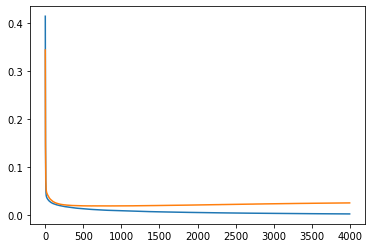

In [211]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

model = keras.Sequential()
model.add(Dense(10, activation = 'relu', input_shape=(train_x.shape[1],)))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

hist = model.fit(train_x, train_y, epochs=4000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

4/4 [==============================] - 0s 3ms/step - loss: 0.0187 - mape: 19.3584
loss 0.01868983544409275
mape 19.358407974243164


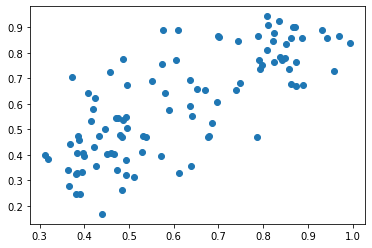

In [212]:
loss, mape = model.evaluate(test_x, test_y)
print("loss", loss)
print("mape",mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

## RMSE 계산하기

In [213]:
predicted = y_ * (y_max - y_min) + y_min
predicted = np.exp(predicted) - 1.

org_test_y = test_y * (y_max - y_min) + y_min
org_test_y = np.exp(org_test_y) - 1.

rmse tf.Tensor(1844985.9, shape=(), dtype=float32)


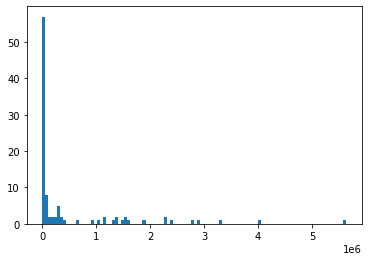

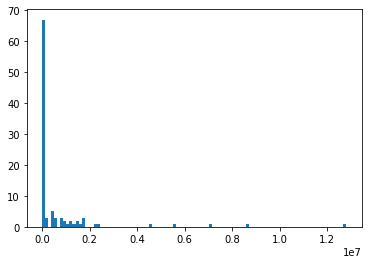

In [214]:
from tensorflow.keras.metrics import RootMeanSquaredError

rmse = RootMeanSquaredError()(org_test_y, predicted)
print("rmse",rmse)

plt.hist(predicted, bins = 100)
plt.show()
plt.hist(org_test_y, bins = 100)
plt.show()

## 예측하기

In [215]:
predicted = model.predict(submission_x)

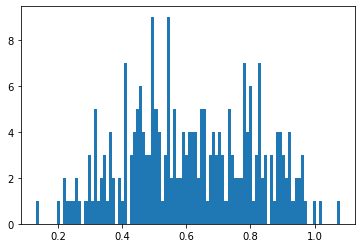

In [216]:
plt.hist(predicted, bins = 100)
plt.show()

In [217]:
predicted = predicted * (y_max - y_min) +y_min

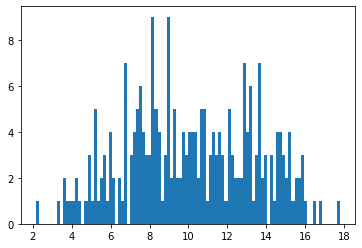

In [218]:
plt.hist(predicted, bins = 100)
plt.show()

In [219]:
predicted = np.exp(predicted) -1.

In [220]:
predicted.shape

(243, 1)

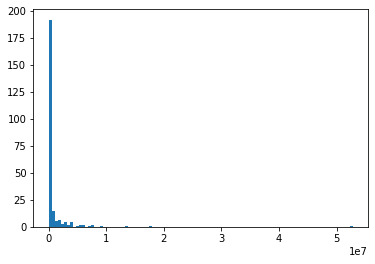

In [221]:
plt.hist(predicted.flatten(), bins=100)
plt.show()

## submission 파일 만들기

In [222]:
!head submission.csv

title,box_off_num
용서는 없다,202975
아빠가 여자를 좋아해,829885
하모니,508127
의형제,3898247
평행 이론,2364169
회오리 바람,119673
경계도시 2,5394
이웃집 남자,344590
아마존의 눈물 극장판,8694


In [223]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [224]:
final_df = pd.DataFrame(submission_df.title)
final_df.head()

,title
0,용서는 없다
1,아빠가 여자를 좋아해
2,하모니
3,의형제
4,평행 이론


In [225]:
final_df['box_off_num'] = predicted.astype(np.int)
final_df.head()

,title,box_off_num
0,용서는 없다,415083
1,아빠가 여자를 좋아해,855196
2,하모니,119098
3,의형제,1165974
4,평행 이론,6161794


In [226]:
final_df.to_csv("submission.csv", index=False)

In [227]:
!head submission.csv

title,box_off_num
용서는 없다,415083
아빠가 여자를 좋아해,855196
하모니,119098
의형제,1165974
평행 이론,6161794
회오리 바람,33651
경계도시 2,1148
이웃집 남자,849
아마존의 눈물 극장판,14931
